In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
### downloading files
import sys

sys.path.append("../../src")

from bleachbench.data import dataloader
from bleachbench.utils import config, utils

In [ ]:
import xarray as xa

p1_fps = (config.sst_dir / "CRW_SST" / "patch_-20_0_-120_-100").glob("*.nc")
p2_fps = (config.sst_dir / "CRW_SST" / "patch_-20_0_-140_-120").glob("*.nc")


p1_ds = xa.open_mfdataset(p1_fps)
p2_ds = xa.open_mfdataset(p2_fps)
xa.combine_by_coords([p1_ds, p2_ds], combine_attrs="drop").isel(time=-1)[
    "CRW_SST"
].plot()

In [21]:
from pathlib import Path

fps = Path(
    "/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/bleachbench/data/sst/CRW_SST/comb"
).rglob("*.nc")
all_ds = xa.open_mfdataset(fps)

In [ ]:
# better run from the command line

dataloader.GetERDAPP(
    date_range=("2012-01-01T12:00:00Z", "2014-01-28T12:00:00Z"),
    lats=(-32, 0),
    lons=(130, 170),
    output_dir=config.sst_dir / "CRW_SST",
).run()

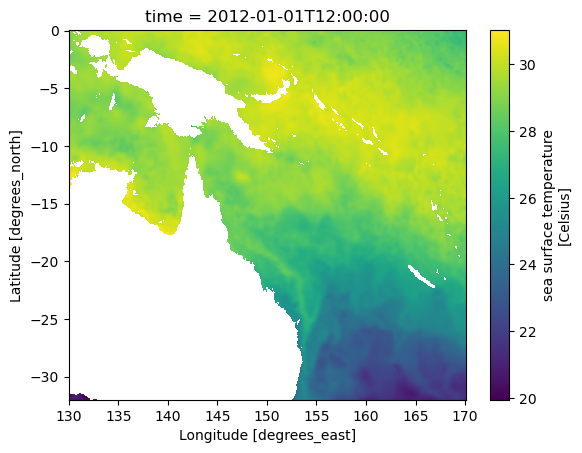

In [18]:
import xarray as xa

ds = xa.open_dataset(config.sst_dir / "CRW_SST" / "CRW_SST_2012-01-01_2012-01-31.nc")
ds.isel(time=0)["CRW_SST"].plot()
